In [1]:
import os
import pandas as pd
import numpy as np 

In [63]:
os.chdir("D:\\MDA\\Course\\Boot Camp\\SCMA 632\\Assignments\\A1a")

In [64]:
df = pd.read_csv("NSSO68.csv", encoding = "Latin-1", low_memory = False)

In [65]:
df.head(3)

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.0,1141.4924,30.942394,GUJ,2,12.0,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.5,1244.5535,29.286153,GUJ,2,333.0,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.0,1050.3154,31.527046,GUJ,2,35.0,214.84


In [107]:
df.state_1.unique()

array(['GUJ', 'ORI', 'CHTSD', 'MP', 'JRKD', 'WB', 'AP', 'MH', 'D&D',
       'D&NH', 'MIZ', 'TRPR', 'MANPR', 'ASSM', 'MEG', 'NAG', 'A&N',
       'PNDCRY', 'TN', 'GOA', 'KA', 'KE', 'LKSDP', 'SKM', 'Bhr', 'UP',
       'RJ', 'ARP', 'DL', 'HR', 'Pun', 'HP', 'UT', 'Chandr', 'J$K'],
      dtype=object)

In [75]:
Bhr = df[df['state_1']=="Bhr"]

In [76]:
Bhr.isnull().sum().sort_values(ascending = False)

soyabean_q             4582
soyabean_v             4582
Otherwise_possessed    4407
Meals_School           4299
Meals_Employer         4284
                       ... 
cabbage_q                 0
cauli_q                   0
parwal_q                  0
bhindi_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [77]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [78]:
Bhr_new = Bhr[['state_1','District','Sector','Region','State_Region','ricetotal_q',
              'wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q',
              'Beveragestotal_v','Meals_At_Home']]

In [79]:
Bhr_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       20
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [80]:
Bhr_clean = Bhr_new.copy()

In [81]:
Bhr_clean.loc[:, 'Meals_At_Home'] = Bhr_clean['Meals_At_Home'].fillna(Bhr_new['Meals_At_Home'].mean())

In [82]:
Bhr_clean.isnull().any()


state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

# Outlier Checking

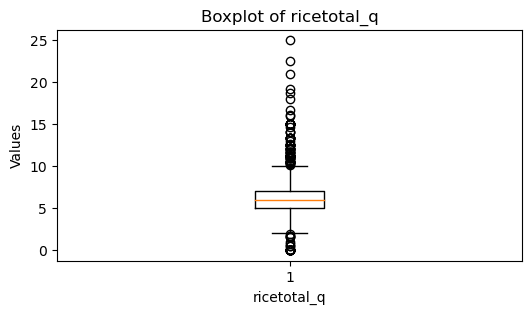

In [83]:
import matplotlib.pyplot as plt
# Assuming Bhr_clean is your DataFrame
plt.figure(figsize=(6, 3))
plt.boxplot(Bhr_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [84]:
rice1 = Bhr_clean['ricetotal_q'].quantile(0.25)
rice2 = Bhr_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [85]:
Bhr_clean=Bhr_new[(Bhr_new['ricetotal_q']<=up_limit)&(Bhr_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1d58d30c910>,
 'caps': [<matplotlib.lines.Line2D at 0x1d58d30dbd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d58d30c090>],
 'medians': [<matplotlib.lines.Line2D at 0x1d58d30eb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d58d30f350>],
 'means': []}

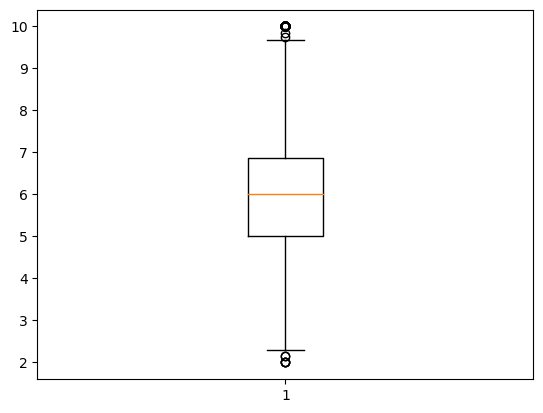

In [86]:
plt.boxplot(Bhr_clean['ricetotal_q'])

In [87]:
Bhr_clean['District'].unique()


array([28, 36, 31, 32, 35, 30, 34, 33, 29, 37, 26, 22, 25, 24, 23, 27, 13,
        8,  9, 12,  7, 11, 10,  6, 14,  5, 18, 19, 17, 21, 20, 16, 15,  3,
        2,  1,  4, 38], dtype=int64)

In [88]:
# Replace values in the 'Sector' column
Bhr_clean.loc[:,'Sector'] = Bhr_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [89]:
# Total Consumption

Bhr_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [90]:
Bhr_clean.loc[:, 'total_consumption'] = Bhr_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\vijay\AppData\Local\Temp\ipykernel_25088\1309967640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bhr_clean.loc[:, 'total_consumption'] = Bhr_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [91]:
Bhr_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
28968,Bhr,28,RURAL,2,102,8.000000,8.333333,0.000000,0,1.666667,0.000000,44.235150,75.000000,4.0,137.235150
28969,Bhr,28,RURAL,2,102,6.666667,10.000000,0.000000,0,0.333333,0.000000,38.600350,8.333333,60.0,63.933683
28970,Bhr,28,RURAL,2,102,6.428571,8.571429,0.035714,0,0.142857,0.171429,29.118924,4.285714,56.0,48.754639
28971,Bhr,28,RURAL,2,102,8.000000,6.000000,0.000000,0,0.200000,0.020000,31.400921,20.000000,60.0,65.620921
28972,Bhr,28,RURAL,2,102,6.000000,6.000000,0.000000,0,0.200000,0.320000,30.060374,8.000000,60.0,50.580374


In [92]:
Bhr_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              23.080907  50.422087  271.850485  15.033400
2              24.983269  54.778735  272.858577  17.157214

In [93]:
Bhr_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                22.836018  47.740706  169.393992  22.585786
2                22.105586  52.617024  155.750525  22.666783
3                26.689422  48.265556  188.188562  21.391850
4                28.209882  49.574525  197.383600  20.625150
5                19.111513  45.599575  135.300375  22.333151
6                13.730889  50.171055   92.120210  31.866872
7                15.108829  51.056417  106.500192  28.617521
8                19.641221  54.902826  115.250300  21.375150
9                21.463655  52.129258  135.810380  23.571788
10               23.094443  55.086234  171.200317  25.337633
11               22.324957  59.231308  168.400480  30.000230
12               36.176428  73.739236  218.515600  30.260146
13               14.556325  42.085682  112.450335  15.033400
14               24.995280  51.269129  165.017067  20.945113
15               17.874341  49.344405  117.283720  24.121521
16               14.041666  42.347927  100.638027  21.700233
17               22.059394  49.067931  180.266908  17.583447
18               14.673922  43.796694  129.125675  24.400248
19               17.511481  45.544926  154.781350  21.262892
20               14.801866  47.626896  100.728397  26.500145
21               43.272177  64.761238  271.850485  24.355175
22               28.697781  66.196600  184.025445  25.437619
23               31.825372  65.813143  240.375490  22.778629
24               33.254070  62.594386  225.533325  23.972339
25               33.183247  71.529119  249.275262  23.343894
26               21.342853  59.299726  161.630163  27.750113
27               25.747595  50.646293  162.017600  20.258470
28               23.461780  53.197534  175.747112  17.157214
29               17.622314  48.755450  118.156656  22.350143
30               23.936013  47.458666  198.446530  18.607264
31               20.546438  51.024850  160.067167  17.313472
32               19.477580  48.844742  110.903538  20.233550
33               30.896829  53.940015  272.858577  27.415824
34               14.209131  49.972733  104.975397  26.678846
35               19.170197  49.340958  210.871295  21.400150
36               22.410160  53.310319  181.400450  21.825824
37               19.293551  56.072043  130.610276  29.970088
38               19.947355  51.789628  145.437886  27.060083

In [94]:
total_consumption_by_districtcode=Bhr_clean.groupby('District')['total_consumption'].sum()

In [95]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
28    11331.074687
2      8313.489831
22     8142.181741
Name: total_consumption, dtype: float64

In [108]:
Bhr_clean.loc[:,"District"] = Bhr_clean.loc[:,"District"].replace({28: "Patna", 6: "Supaul", 23: "Bhagalpur"})

In [109]:
total_consumption_by_districtname=Bhr_clean.groupby('District')['total_consumption'].sum()

In [110]:
from statsmodels.stats import weightstats as stests

In [111]:
rural=Bhr_clean[Bhr_clean['Sector']=="RURAL"]
urban=Bhr_clean[Bhr_clean['Sector']=="URBAN"]

In [112]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
28968,Bhr,Patna,RURAL,2,102,8.000000,8.333333,0.000000,0,1.666667,0.000000,44.235150,75.000000,4.0,137.235150
28969,Bhr,Patna,RURAL,2,102,6.666667,10.000000,0.000000,0,0.333333,0.000000,38.600350,8.333333,60.0,63.933683
28970,Bhr,Patna,RURAL,2,102,6.428571,8.571429,0.035714,0,0.142857,0.171429,29.118924,4.285714,56.0,48.754639
28971,Bhr,Patna,RURAL,2,102,8.000000,6.000000,0.000000,0,0.200000,0.020000,31.400921,20.000000,60.0,65.620921
28972,Bhr,Patna,RURAL,2,102,6.000000,6.000000,0.000000,0,0.200000,0.320000,30.060374,8.000000,60.0,50.580374


In [113]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
66802,Bhr,21,URBAN,1,101,6.25,7.5,0.375,0,0.0,0.0,32.025225,5.00,60.0,51.150225
66803,Bhr,21,URBAN,1,101,5.40,7.0,0.000,0,0.0,0.0,19.536190,3.00,60.0,34.936190
66804,Bhr,21,URBAN,1,101,6.00,8.0,0.000,0,0.0,0.0,22.222210,2.00,60.0,38.222210
66805,Bhr,21,URBAN,1,101,7.50,6.0,0.000,0,0.0,0.0,25.250263,0.00,60.0,38.750263
66806,Bhr,21,URBAN,1,101,8.75,10.0,0.500,0,0.0,0.0,38.012828,6.25,60.0,63.512828


In [114]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [115]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 9.241990377317697
P-Value: 2.419538737705544e-20
